In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Suppress all user warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load your population data from Excel
data = pd.read_excel('Population.xlsx')

In [3]:
data

,Year,Population
0,1960,180671000
1,1961,183691000
2,1962,186538000
3,1963,189242000
4,1964,191889000
...,...,...
59,2019,328329953
60,2020,331511512
61,2021,332031554
62,2022,333287557


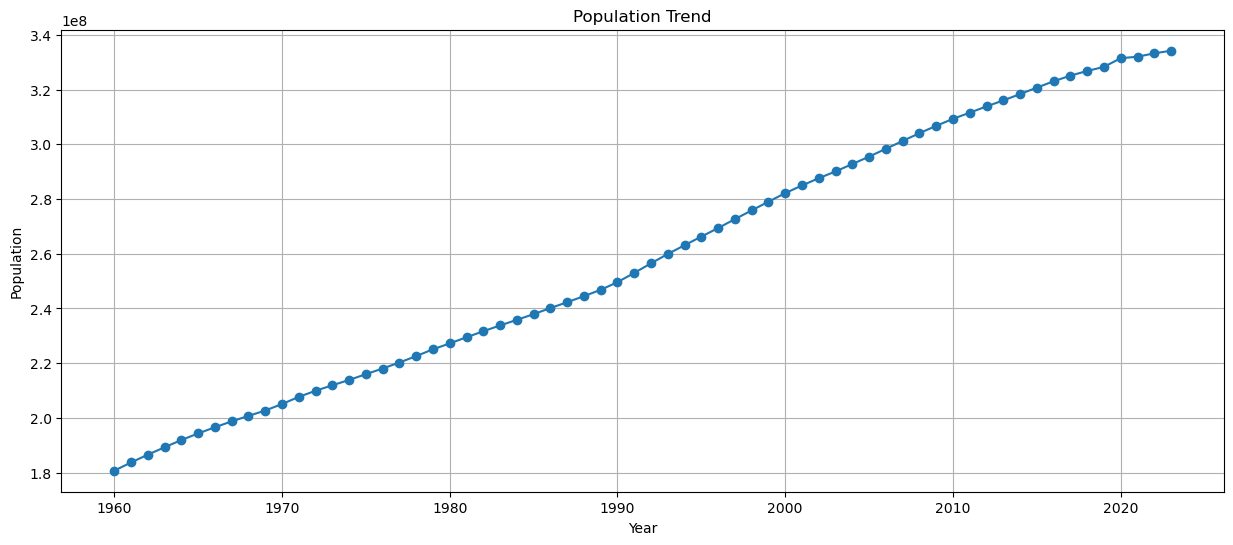

In [4]:
# Plot the trend
plt.figure(figsize=(15, 6))  # Adjust the figsize to your preference
plt.plot(data['Year'], data['Population'], marker='o', linestyle='-')
plt.title('Population Trend')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()

Forecasted population for the next 10 years:
Year 2024: 341612037.64
Year 2025: 344162440.20
Year 2026: 346712842.77
Year 2027: 349263245.34
Year 2028: 351813647.90
Year 2029: 354364050.47
Year 2030: 356914453.04
Year 2031: 359464855.60
Year 2032: 362015258.17
Year 2033: 364565660.73


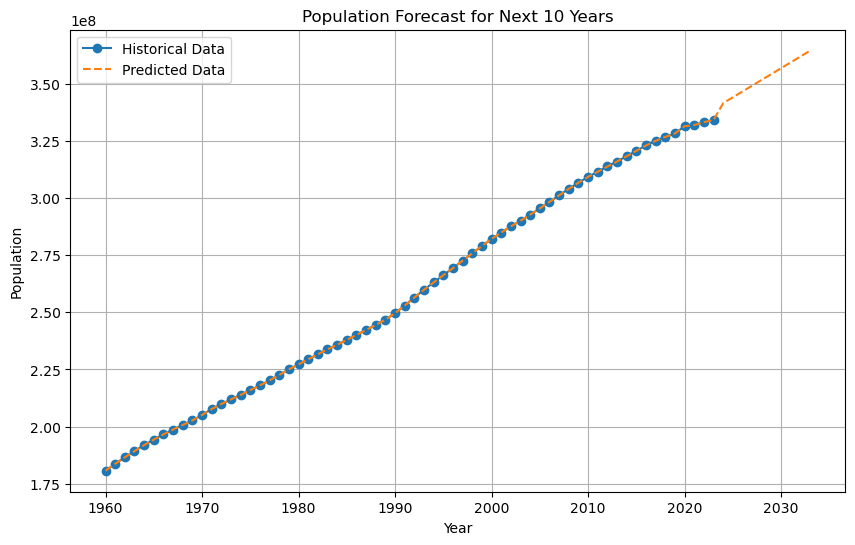

In [5]:
from sklearn.linear_model import LinearRegression

# Set the year column as the index
data.set_index('Year', inplace=True)

# Step 3: Choose a machine learning model
model = LinearRegression()

# Step 4: Train the model
X = np.array(data.index).reshape(-1, 1)
y = data['Population'].values
model.fit(X, y)

# Step 5: Make predictions for the next 10 years
future_years = np.arange(data.index[-1] + 1, data.index[-1] + 11).reshape(-1, 1)
future_population = model.predict(future_years)

# Step 6: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Population'], label='Historical Data', marker='o')
plt.plot(np.concatenate((data.index, future_years.flatten())), 
         np.concatenate((y, future_population)), 
         label='Predicted Data', linestyle='--')
plt.title('Population Forecast for Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Step 7: Print forecast numbers
print("Forecasted population for the next 10 years:")
for year, population in zip(future_years.flatten(), future_population):
    print(f"Year {int(year)}: {population:.2f}")

plt.show()


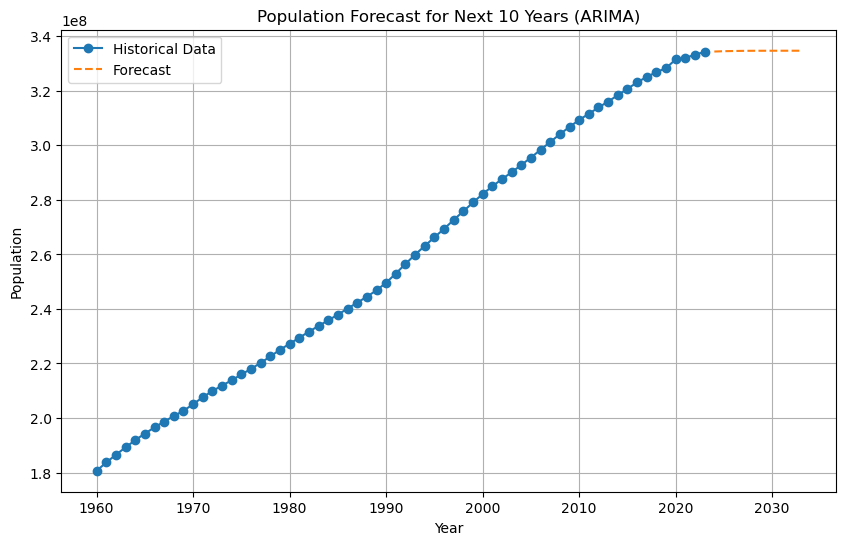

Forecasted population for the next 10 years (ARIMA):
Year 2024: 334395381.40
Year 2025: 334525316.47
Year 2026: 334590778.49
Year 2027: 334645560.81
Year 2028: 334674387.51
Year 2029: 334683901.99
Year 2030: 334690097.32
Year 2031: 334693641.44
Year 2032: 334695840.68
Year 2033: 334696914.48


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Step 3: Train the ARIMA model
model = ARIMA(data['Population'], order=(5,1,0)) # Example order, you can tune this
model_fit = model.fit()

# Step 4: Make predictions for the next 10 years
forecast = model_fit.forecast(steps=10)

# Step 5: Plot the data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Population'], label='Historical Data', marker='o')
plt.plot(range(data.index[-1]+1, data.index[-1]+11), forecast, label='Forecast', linestyle='--')
plt.title('Population Forecast for Next 10 Years (ARIMA)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print forecast numbers
print("Forecasted population for the next 10 years (ARIMA):")
for year, population in zip(range(data.index[-1]+1, data.index[-1]+11), forecast):
    print(f"Year {year}: {population:.2f}")


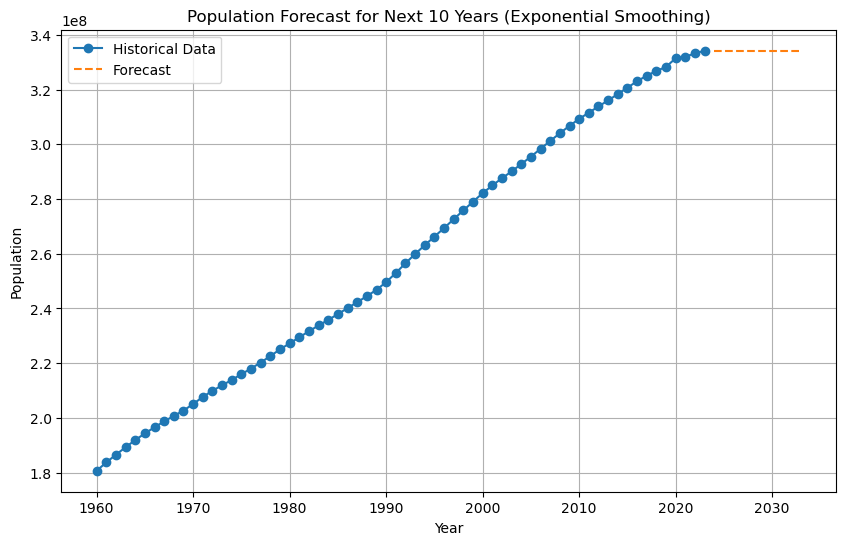

Forecasted population for the next 10 years (Simple Exponential Smoothing):
Year 2024: 334229091.05
Year 2025: 334229091.05
Year 2026: 334229091.05
Year 2027: 334229091.05
Year 2028: 334229091.05
Year 2029: 334229091.05
Year 2030: 334229091.05
Year 2031: 334229091.05
Year 2032: 334229091.05
Year 2033: 334229091.05


In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Step 3: Train the Simple Exponential Smoothing model
model = SimpleExpSmoothing(data['Population'])
model_fit = model.fit()

# Step 4: Make predictions for the next 10 years
forecast = model_fit.forecast(steps=10)

# Step 5: Plot the data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Population'], label='Historical Data', marker='o')
plt.plot(range(data.index[-1]+1, data.index[-1]+11), forecast, label='Forecast', linestyle='--')
plt.title('Population Forecast for Next 10 Years (Exponential Smoothing)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print forecast numbers
print("Forecasted population for the next 10 years (Simple Exponential Smoothing):")
for year, population in zip(range(data.index[-1]+1, data.index[-1]+11), forecast):
    print(f"Year {year}: {population:.2f}")


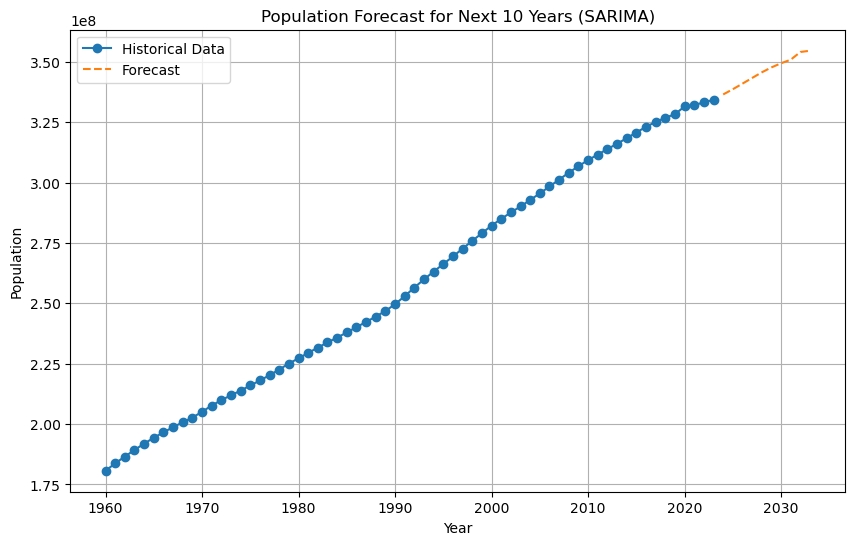

Forecasted population for the next 10 years (SARIMA):
Year 2024: 336501613.28
Year 2025: 338665909.39
Year 2026: 340979992.44
Year 2027: 343324314.66
Year 2028: 345651616.24
Year 2029: 347698630.76
Year 2030: 349412976.41
Year 2031: 350904057.42
Year 2032: 354085020.95
Year 2033: 354606186.36


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 3: Train the SARIMA model
model = SARIMAX(data['Population'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Step 4: Make predictions for the next 10 years
forecast = model_fit.forecast(steps=10)

# Step 5: Plot the data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Population'], label='Historical Data', marker='o')
plt.plot(range(data.index[-1]+1, data.index[-1]+11), forecast, label='Forecast', linestyle='--')
plt.title('Population Forecast for Next 10 Years (SARIMA)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print forecast numbers
print("Forecasted population for the next 10 years (SARIMA):")
for year, population in zip(range(data.index[-1]+1, data.index[-1]+11), forecast):
    print(f"Year {year}: {population:.2f}")
